#Question 2

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
dataframe = pd.read_csv("/content/sample_data/lung cancer dataset.csv")

In [ ]:
dataframe_num = dataframe
replacement_map = {'F': 1, 'M': 2}
dataframe_num['GENDER'] = dataframe_num['GENDER'].replace(replacement_map)
replacement_map = {'NO': 1, 'YES': 2}
dataframe_num['LUNG_CANCER'] = dataframe_num['LUNG_CANCER'].replace(replacement_map)
correlation_matrix = dataframe_num.corr()
#print(correlation_matrix)

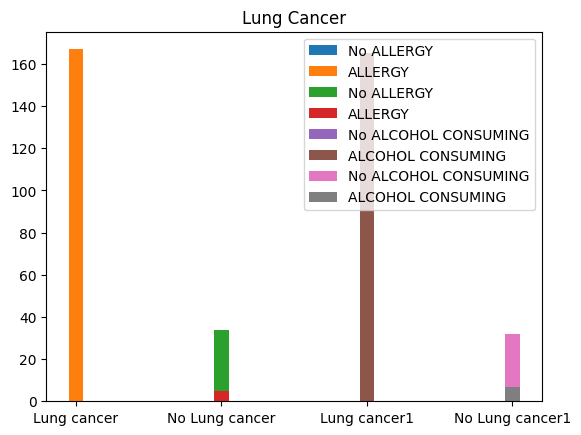

In [ ]:
df = dataframe_num
#df = dataframe_num.sample(100)
fig, ax = plt.subplots()

ax.bar('Lung cancer', df[(df['LUNG_CANCER'] == 2) & (df['ALLERGY '] == 1)].shape[0], width=0.1, label='No ALLERGY')
ax.bar('Lung cancer', df[(df['LUNG_CANCER'] == 2) & (df['ALLERGY '] == 2)].shape[0],width=0.1,label='ALLERGY')

ax.bar('No Lung cancer', df[(df['LUNG_CANCER'] == 1) & (df['ALLERGY '] == 1)].shape[0], width=0.1, label='No ALLERGY')
ax.bar('No Lung cancer', df[(df['LUNG_CANCER'] == 1) & (df['ALLERGY '] == 2)].shape[0],width=0.1,label='ALLERGY')

ax.bar('Lung cancer1', df[(df['LUNG_CANCER'] == 2) & (df['ALCOHOL CONSUMING'] == 1)].shape[0], width=0.1, label='No ALCOHOL CONSUMING')
ax.bar('Lung cancer1', df[(df['LUNG_CANCER'] == 2) & (df['ALCOHOL CONSUMING'] == 2)].shape[0],width=0.1,label='ALCOHOL CONSUMING')

ax.bar('No Lung cancer1', df[(df['LUNG_CANCER'] == 1) & (df['ALCOHOL CONSUMING'] == 1)].shape[0], width=0.1, label='No ALCOHOL CONSUMING')
ax.bar('No Lung cancer1', df[(df['LUNG_CANCER'] == 1) & (df['ALCOHOL CONSUMING'] == 2)].shape[0],width=0.1,label='ALCOHOL CONSUMING')

ax.set_title('Lung Cancer')
ax.legend()

In [ ]:
dataframe_x = dataframe_num[dataframe_num.columns.difference(['LUNG_CANCER'])]
X_train, X_test, y_train, y_test = train_test_split(dataframe_x, dataframe_num['LUNG_CANCER'], test_size=0.3)

In [ ]:
model = LogisticRegression(random_state=0,penalty='l2')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
report = classification_report(y_train, y_train_pred)
print("It is report classification on training data:  ",report)
report = classification_report(y_test, y_test_pred)
print("It is report classification on testing data:  ",report)

It is report classification on training data:                 precision    recall  f1-score   support

           1       0.88      0.85      0.86        26
           2       0.98      0.98      0.98       190

    accuracy                           0.97       216
   macro avg       0.93      0.92      0.92       216
weighted avg       0.97      0.97      0.97       216

It is report classification on testing data:                 precision    recall  f1-score   support

           1       0.50      0.46      0.48        13
           2       0.91      0.93      0.92        80

    accuracy                           0.86        93
   macro avg       0.71      0.69      0.70        93
weighted avg       0.86      0.86      0.86        93



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
